<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Имеем 23699 строк. Пропуски есть в 14 столбцах с данными из 22. В столбцах floors_total и locality_name немного пропусков, менее 1%, в остальных данных пропусков больше. Также необходимо проверить некоторые данные на корректность. Стоит вывести данные с пропусками по каждому столбцу, чтобы попыаться понять их причину и значимость. Начнем по порядку. Проверить пропуски необходимо в  стобцах:

ceiling_height

floors_total

living_area

is_apartment

kitchen_area

balcony

locality_name

airports_nearest

cityCenters_nearest

parks_around3000

parks_nearest

ponds_around3000

ponds_nearest

days_exposition

## Предобработка данных

Проверим дубликаты

In [2]:
df.duplicated().sum()

0

Возможно здесь будут лишние строки кода, но чтобы быть уверенным в качестве данных, я решил пройтись по всем столбцам и проверить адекватность данных даже там, где нет пропусков. Первый столбец - количество фото. В нем возможно тоже есть перебор:

In [3]:
print(df['total_images'].max())
print(df['total_images'].min())

50
0


Где то фото нет, а где то 50. Пожалуй, продавец очень хочет продать её, раз загрузил целый фотоальбом.

Цена - ищем изъяны:

In [4]:
# приводим тип данных к целочисленным, находим минимальное и максимальное значения:
df['last_price'] = df['last_price'].astype('int')
print(df['last_price'].min())
print(df['last_price'].max())

12190
763000000


763 миллиона - почему бы и нет? У богатых свои причуды. Поиск на популярном сайте объявлений дал результат в 500 миллионов, поэтому 763 тоже вполне себе. А вот 12190 - странная цифра. Примерно столько нужно человеку чтобы прожить месяц по мнению нашего государства. Но цена недвижимости, это врядли. Скорее всего цена указана не в рублях. Будем разбираться. Взглянем на данные, в которых цена меньше 500 000, так как дешевле - врядли объективная стоимость:

In [5]:
df[df['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000,40.0,2017-12-11T00:00:00,1,NaN,5.0,NaN,3,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000,29.1,2016-05-05T00:00:00,1,2.50,5.0,17.0,5,NaN,...,5.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14911,5,430000,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16032,8,480000,32.0,2019-01-06T00:00:00,1,NaN,2.0,16.0,1,NaN,...,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
16219,14,450000,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы видим что все что дешевле 500 000 отдаленные деревни, а единственное значение гораздо меньшее - это с ценой в 12190. Предположим что цена указана в евро или долларах. На 20 марта 2019 года курс доллара ~ 64 рубля, а евро ~ 74 рубля. Среднее значение 69, умножаем цену на 69, получаем ~ 840 000 рублей. За квартиру в Питере с площадью более 100 метров тоже маловероятно. Скорее всего цена была указана в тысячах, то есть 12 тысяч тысяч. Соответственно 12 млн рублей очень даже вероятно. В этом столбце мы имеем всего одно некорректное значение, и в массе 23699 значений это ничтожно малый объем данных. Но если мы можем сделать данные лучше, мы должны это сделать. Умножим данные на 1000 и проверим:

In [6]:
# лучше сразу присвоить значение, так как повторное выполнение кода будет вновь и вновь умножать результат:
df.loc[8793, 'last_price'] = 12190000.0
df['last_price'].min()


430000.0

Отлично. Следующая цель total_area, площадь в квадратных метрах. Формат данных не меняем, так как дробные части метра могут повлиять на данные, сменить тип данных на целочисленный можно и позднее:

In [7]:
# снова находим минимальное и максимальное значение:
print(df['total_area'].min())
print(df['total_area'].max())

12.0
900.0


На 12м2 уместиться сложно, но можно. Но 900 м2? Квартира за 500 млн имеет площадь 465 м2. Слишком много. Нужно взглянуть на объявления с площадью более 500 м2:

In [8]:
df[df['total_area'] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


12-ти комнатный замок. 420 млн, на мой взгляд приемлемая цена для 2017 года. Хотя среднестатистический учитель зарабатывал бы на него примерно 1167 лет. 

Далее first_day_exposition - дата первого размещения. Будем иметь представление о временных рамках предоставленных данных, предварительно изменив тип данных на datetime:

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(df['first_day_exposition'].min())
print(df['first_day_exposition'].max())

2014-11-27 00:00:00
2019-05-03 00:00:00


Данные за 5 лет 2014 - 2019 года. 

rooms - количество комнат, узнаем диапазон значений:

In [10]:
print(df['rooms'].min())
print(df['rooms'].max())

0
19


19 комнат может быть, а вот 0 нет. Посмотрим на строки с безкомнатными квартирами, отортируем по площади квартиры, так как скорее всего в однокомнатных квартирах просто не указали количество комнат, и площадь небольшая, и выведем последние значения:

In [11]:
df[df['rooms'] == 0].sort_values(by='total_area').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15714,1,3000000.0,32.03,2017-08-08,0,NaN,9.0,15.78,5,NaN,...,NaN,1.0,Санкт-Петербург,27850.0,9766.0,0.0,NaN,2.0,784.0,14.0
15704,7,2750000.0,32.20,2018-07-05,0,NaN,17.0,19.20,7,NaN,...,NaN,2.0,Санкт-Петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,4.0
7008,4,5200000.0,32.30,2017-09-14,0,NaN,11.0,25.50,4,NaN,...,NaN,NaN,Санкт-Петербург,30824.0,6469.0,1.0,756.0,1.0,936.0,86.0
12229,12,6200000.0,32.40,2018-02-22,0,3.00,9.0,18.30,3,NaN,...,NaN,2.0,Санкт-Петербург,25987.0,4823.0,0.0,NaN,2.0,849.0,32.0
18132,6,4800000.0,32.50,2019-04-09,0,2.80,17.0,22.90,5,NaN,...,NaN,2.0,Санкт-Петербург,43996.0,13576.0,1.0,396.0,0.0,NaN,NaN
16521,13,3600000.0,32.80,2017-07-17,0,2.80,16.0,23.20,4,NaN,...,NaN,1.0,Санкт-Петербург,49888.0,16139.0,1.0,472.0,0.0,NaN,169.0
21628,9,3900000.0,34.00,2017-03-18,0,NaN,20.0,24.00,10,NaN,...,NaN,2.0,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4683,2,3650000.0,35.00,2018-02-01,0,NaN,25.0,23.40,25,NaN,...,NaN,NaN,Санкт-Петербург,43431.0,12188.0,0.0,NaN,0.0,NaN,100.0


Я встречал много однокомнатных квартир с площадью до 40 м2, поэтому неуказанное количество комнат заменим на 1, для остальных напишем функцию с шагом 20 м2 - средний размер большой комнаты. 

In [12]:
# напишем функцию для замены значений в колчестве комнат, возможно она пригодиться:
# def rooms_edit(row):
#    if row <= 40:
#        return 1
#    elif 40 < row <= 60:
#        return 2
#    elif 60 < row <= 80:
#        return 3
#    elif 90 < row <= 120:
#        return 4
#    else:
#        return 5

# применим для объявелений с нулевым количеством комнат:

# df.loc[df['rooms'] == 0, 'rooms'] = df.loc[df['rooms'] == 0, 'total_area'].apply(rooms_edit)
 
# результат:
    
# df['rooms'].value_counts()

# можно также форматом таблицы:
# df[df['rooms'] == 0]
df['rooms'].isna().sum()

0

Справились. Следующий столбец - ceiling_height - отвечает за высоту потолков, нужно проверить не только корректность данных но и пропуски. Найдем максимальное, минимальное, среднее значения и медиану, так как скорее всего медианой будет целесообразно заменять пропуски:

In [13]:
print(df['ceiling_height'].max())
print(df['ceiling_height'].min())
print(df['ceiling_height'].mean())
print(df['ceiling_height'].median())

100.0
1.0
2.77149889685604
2.65


Медиана 2.65 - запомним, это нам пригодится. 1 метр и 100 метров явно выброс. Взглянем на строки с высотой меньше 2.4 метра:

In [14]:
df[df['ceiling_height'] < 2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000.0,47.00,2018-01-12,3,2.34,5.0,NaN,1,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,NaN,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1582,4,4100000.0,45.60,2016-01-13,2,2.30,9.0,28.400000,8,False,...,7.00,2.0,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.000000,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.600000,9,NaN,...,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5498,17,2200000.0,56.00,2018-04-02,2,2.30,5.0,45.000000,1,NaN,...,9.00,2.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.500000,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.200000,12,NaN,...,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
12755,2,1400000.0,22.50,2017-09-21,1,2.20,2.0,18.000000,2,NaN,...,4.50,1.0,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.0


21 строка. Стоит скорректировать данные, так как по СНиП 2.08.01-89 высота потолков не может быть ниже 2.4 метра. Теперь посмотрим на объявления с высотой более 6 метров:

In [15]:
df[df['ceiling_height'] > 6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


29 объявлений. Визуально среднее значение 25-30. Явно перепутали с каким то другим параметром, скорее всего с площадью либо общей, либо жилой, либо площадью какой то отдельной комнаты, так как сумма жилой площади и сумма так называемой высоты потолка в этих объявлениях примерно равна общей площади. Заменим пропуски и некорректные данные на медиану.

In [16]:
# заполним пропуски:

df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

# напишем функцию для корректировки высоты потолка:

def high_edit(high):
    if 2.4 > high or high > 6.0:
        return 2.65
    return high

# и применим её:

df['ceiling_height'] = df['ceiling_height'].apply(high_edit)

print(df['ceiling_height'].max())
print(df['ceiling_height'].min())

# проверка уникальных значений:
# df['ceiling_height'].unique()




6.0
2.4


Следующий столбец floors_total - количество этажей - имеет пропуски. Посмотрим на строки с пропусками и на экстремальные значения:

In [17]:
display(df[df['floors_total'].isna()])
print(df['floors_total'].max())
print(df['floors_total'].min())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


60.0
1.0


86 пропусков и 60 этажей. Пропуски заменим наличием этажа floor + 1, так как нам в исследовании необходимо посчитать квартиры на последнем этаже. Шанс что все объявления с пропусками общей этажности имеют квартиры на последнем этаже, на мой взгляд весьма невелик. А 60 этажей есть только в Лахта-центре. Лидер-Тауэр имеет 42 этажа, но это бизнес-центр. Самый многоэтажный жилой комплекс - Алексанр Невский, имеет 37 этажей. Это важно, потому что в условяих проекта указано про объявления продажи именно квартир, а не помещений. Поэтому нужно посмотреть на все объявления с этажностью более 37 - это скорее всего выбросы. Этажи нужно перевести в целочисленные значения. Врядли продаются квартиры на втором с половиной этаже. 

In [18]:
# замена пропусков:
df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1)

# менияем формат на целочисленный:

df['floors_total'] = df['floors_total'].astype('int')

# вывод объявлений с этажностью более 37:

df[df['floors_total'] > 37]




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


2 объявления - в этих объявлениях этаж с квартирой не является последним. Думаю в исследовани нам эти объявления не сыграют роли, так как их доля менее 1%.

Следующий столбец living_area - жилая площадь, тут тоже есть пропуски. Смотрим на них и на экстремальные значения:

In [19]:
print(df['living_area'].isna().sum())
print(df['living_area'].min())
print(df['living_area'].max())

1903
2.0
409.7


1903 пропуска. Думаю их стоит заменить медианным значением отношения жилой площади к общей. Посчитать сколько объявлений с жилой площадью менее 10 м2, так как именно столько примерно полагается на человека в России. Максимальные значения в пределах разумного. Для богатых, конечно. 

In [20]:
df[df['living_area'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.40,2019-02-07,1,2.90,8,8.3,7,NaN,...,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.00,2017-10-31,1,2.65,8,9.0,2,NaN,...,23.0,NaN,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.00,2017-01-29,2,2.70,25,9.0,15,NaN,...,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.40,2017-06-15,2,2.60,9,8.4,6,NaN,...,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.00,2017-07-02,1,2.65,17,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.80,2017-06-19,1,2.70,23,9.0,15,NaN,...,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.0,2,NaN,...,NaN,NaN,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
7312,8,3400000.0,27.00,2018-02-21,2,2.50,15,9.0,4,NaN,...,16.0,NaN,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.00,2017-10-25,2,2.65,5,9.0,2,NaN,...,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.00,2018-02-06,2,3.00,6,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


Исходя из информации об общей площади, скорее всего данные просто перепутаны с площадью кухни, так как размер кухни больше жилой площади. Было бы целесообразно поменять их местами. Но я, откровенно, не понимаю как это сделать. В то же время таких квартир всего 25. Думаю такое количество не повлияет на результат, так как объем менее 1% от общего количества объявлений. Заменим пропуски медианным значением.

In [21]:
# запишем отношение в переменную:
liv_area_rait = df['living_area'] / df['total_area']

# удалим пропуски в переменной и найдем медианное отношение:

liv_area_rait = liv_area_rait.median()

# заполним пропуски применив коэффициент к общей площади:

df['living_area'] = df['living_area'].fillna(df['total_area'] * liv_area_rait).round(decimals=2)
df['living_area'].isna().sum()

0

В столбце floor нет пропусков. Посмотрим на эктремальные значения:

In [22]:
print(df['floor'].min())
print(df['floor'].max())

1
33


Все в порядке. Формат столбца int64. is_apartment - апартаменты имеет пропуски. Заменим их на значение "False", так как не указав апартаменты, продавец скорее всего имел в виду что квартира апартаментами не явлется. 

In [23]:
# убираем пропуски:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

studio и open_plan пропустим, так как там нет пропусков и это булевы столбцы. В столбце kitchen_area - площадь кухни так же как с жилой площадью, проверим экстремальные значения и заменим пропуски медианым отношением общей площади к площади кухни других объявлений. 

In [24]:
print(df['kitchen_area'].max())
print(df['kitchen_area'].min())

112.0
1.3


Поступим по другому. Отсортируем данные по стобцу kitchen_area, так как юпитер выводит начало и конец таблицы, увидим все вместе. Возможно не самый правильный вариант, но удобный для меня.

In [25]:
df.sort_values(by='kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14,19.50,10,False,...,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
9138,17,2920000.0,23.29,2018-12-12,1,2.65,3,21.00,1,False,...,2.0,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5,16.00,5,False,...,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
21419,4,1870000.0,20.00,2018-03-06,1,2.50,5,14.00,1,False,...,2.0,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
19642,5,1190000.0,14.00,2018-07-29,1,2.65,5,11.00,1,False,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.50,2016-09-08,1,2.56,18,19.60,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.00,2018-01-12,4,2.55,10,49.97,1,False,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08,1,2.80,9,25.89,2,False,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08,1,2.65,9,19.88,4,False,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Данные коррелируются и с общей и с жилой площадью. Менять данные площади кухни не будем. А вот пропуски запонить надо:

In [26]:
# запишем отношение в переменную:
kitch_area_rait = df['kitchen_area'] / df['total_area']

# удалим пропуски в переменной и найдем медианное отношение:

kitch_area_rait = kitch_area_rait.median()

# заполним пропуски применив коэффициент к общей площади:

df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitch_area_rait).round(decimals=2)
df['kitchen_area'].isna().sum()

0

В данных с балконами тоже много пропусков. Ситуация схожа с данными об апартаментах. Если не указан, скорее всего нет. Меням пропуски на 0, а тип меняем на int. Не бывает половина балкона. Он либо есть, либо нет. 

In [27]:
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['balcony'].isna().sum()

0

Столбец locality_name тоже имеет пропуски. Но как их заполнять пока не ясно. Посмотрим на таблицу пропусков

In [28]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15,3,3.55,5,50.80,2,False,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30,3,2.65,4,42.60,2,False,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20,1,2.65,24,15.60,3,False,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11,2,2.65,24,33.10,21,False,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28,2,2.65,5,30.80,5,False,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09,2,3.00,8,39.62,7,False,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10,3,4.00,4,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14,3,2.65,7,47.13,6,False,...,14.31,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20,3,2.65,7,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29,1,2.65,24,20.00,23,False,...,5.17,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


49 пропусков. От Адмиралтейства (условно центр города) до Сосновой поляны - 20 км Лахты - 12 км Девяткино 17 км Парнас -19 км Пр Большевиков. 12 км Рыбацкое - 18 км. Южная граница Купчино - 14 км. Исходя из этих данных округлим радиус города до 20 000 м, и будем заполнять пропуски в название города "Санкт-Петербург", в остальных - "Пригород".

In [29]:
# создадим функцию с условием:

def loc_name_edit(row):
    if row < 20000:
        return 'Санкт-Петербург'
    else:
        return 'Пригород'

# применим для объявелений с пропусками:

df.loc[df['locality_name'].isna(), 'locality_name'] = df.loc[df['locality_name'].isna(), 'cityCenters_nearest'].apply(loc_name_edit)
 
# результат:
    
df['locality_name'].isna().sum()


0

Столбец airports_nearest - расстояние до аэропорта тоже имеет много пропусков. Поскольку в задании нет задач связанных с аэропортом, просто заменим на среднее значение.

In [30]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].mean())
df['airports_nearest'].isna().sum()

0

Столбец cityCenters_nearest - расстояние до центра города. Сгруппируем данные по населенному пункту, найдем медиану значений, ими заполним пропуски. 

In [31]:
# создадим сводную таблицу с медианными значениями:
sity_dist = df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='median')
sity_dist.sort_values(by='cityCenters_nearest')

,cityCenters_nearest
locality_name,
Санкт-Петербург,12242.0
посёлок Парголово,19311.0
поселок Мурино,21888.0
посёлок Стрельна,23506.0
посёлок Шушары,24212.0
посёлок Левашово,25727.0
посёлок Песочный,26099.5
посёлок Петро-Славянка,27165.0
посёлок Лисий Нос,27297.0


In [32]:
# количество населенных пунктов с указанием данных о среднем расстоянии до центра:
print(len(sity_dist))
# всего населенных пунктов
df
print(len(df['locality_name'].value_counts()))


df['cityCenters_nearest'].isna().sum()

29
365


5519

Следовательно не выйдет заполнить все пропуски по среднему значению сгруппировав по населенным пунктам. Сделаем насколько это возможно, остальные данные заменим на медиану с привязкой к населенному пункту 

In [33]:
# Создадим новый столбец, в котором указаны медианные значения расстояния до центра согласно населённому пункту:
df['median_centr_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].transform('mean')
 
# заполним все пустые значения расстояния до центра на медианные значения из нового столбца
df.loc[df['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'] = df.loc[df['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'].fillna(df['median_centr_nearest'])
df.loc[df['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = df.loc[df['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(df['median_centr_nearest'])
df['cityCenters_nearest'].isna().sum()

5386

Послдение столбцы - с информацией о парках и прудах нам не нужны в исследовании, поэтому пропуски заменять в них не будем. Можно предположить что пропуск - это отсутствие парка или пруда. Но это тема отдельного исследования. 

Еще раз взглянем на данные: 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     18313 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Последнюю цену размещения переведем в целочисленный формат. К чему нам эти копейки? А вот площади не будем трогать. Даже половина квадратного метра стоит совсем не копейки...

In [35]:
# 
df['last_price'] = df['last_price'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     18313 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

# 

## Расчёты и добавление результатов в таблицу

Перед нами стоят слудующие задачи:

- узнать цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Узнать цену квадратого метра достаточно просто: разделить цену квартиры на общую площадь, и приведем к целочисленному формату.

In [36]:
# цена метра:
df['price_of_meter'] = df['last_price'] / df['total_area']

# переводим к целочисленному виду:
df['price_of_meter'] = df['price_of_meter'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_centr_nearest,price_of_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,11595.209148,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,24243.387615,82920
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,11595.209148,92785
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.29,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,11595.209148,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,11595.209148,100000


День недели, месяц и год лучше разделить по разным столбцам, так как в последствии нам необходимо отдельно искать их зависимости, данные берем из колонки о первом размещении 'first_day_exposition':

In [37]:
#создаем столбец дня недели
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

#создаем столбец месяца
df['month_exposition'] = df['first_day_exposition'].dt.month

#создаем столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_centr_nearest,price_of_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,11595.209148,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,24243.387615,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,11595.209148,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.29,9,False,...,2.0,84.0,3.0,234.0,424.0,11595.209148,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,11595.209148,100000,1,6,2018


Далее нужно указать этаж квартиры - первый, последний и другой. Вновь категоризируем.

In [38]:
#напишем функцию категоризации по этажам:
def floors_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
#категоризуем этажи с помощью функции  
df['floor_category'] = df.apply(floors_category, axis = 1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,median_centr_nearest,price_of_meter,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,11595.209148,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0.0,NaN,81.0,24243.387615,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2.0,574.0,558.0,11595.209148,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.29,9,False,...,84.0,3.0,234.0,424.0,11595.209148,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,11595.209148,100000,1,6,2018,другой


Соотношения площадей находится делением жилой площади к общей, и кухни к общей. Создаем соответствующие столбцы:

In [39]:
#добавим столбец соотношения жилой площади к общей
df['living_area_rait'] = df['living_area'] / df['total_area']

#добавим столбец отношения площади кухни к общей
df['kitchen_area_rait'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,median_centr_nearest,price_of_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_rait,kitchen_area_rait
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,755.0,NaN,11595.209148,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,81.0,24243.387615,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,574.0,558.0,11595.209148,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.29,9,False,...,234.0,424.0,11595.209148,408176,4,7,2015,другой,0.567862,0.172390
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,48.0,121.0,11595.209148,100000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

Есть несколько задач. Начнем по-порядку, и первая задача выглядит так:


1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучим площадь:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

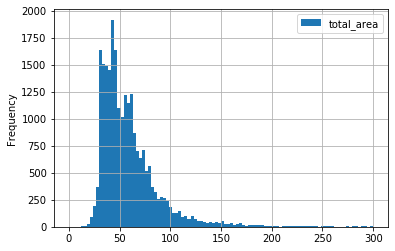

In [40]:
# Хотел сначала через .hist(), но понял что у .plot() больше возможностей:
df.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(6,4), range=(0,300))
df['total_area'].describe()

Данные выглядят адекватно. Большая часть объявлений сконцентирована с площадью от 30 до 100 м2. Далее по убыванию. После 200 м2 объвлений так мало, что они в незначительной степени могут повлиять на исследование. Экстремалные значения - квартиры имеют площадь 12 м2 и 900 м2.

Далее построим график и изучем цену объвлений, до 20 млн:

count    2.369900e+04
mean     6.542063e+06
std      1.088699e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

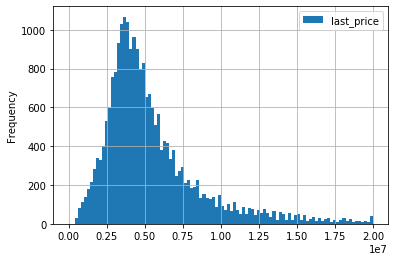

In [41]:
df.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(6,4), range=(0,20000000))
df['last_price'].describe()

Нормальное распределение. Исходя из данных графика наибольшое количество объявлений имеет цену квартиры около 3 млн рублей, однако статистически средняя цена на квартиры равна 6.54 млн рублей. 

На очереде построение графика с числом комнат:

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

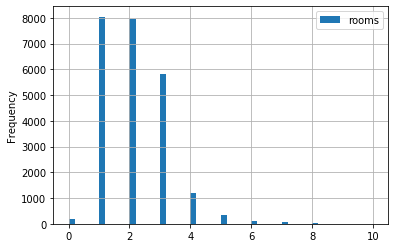

In [42]:
df.plot(y='rooms', kind='hist', bins=50, grid=True, figsize=(6,4), range=(0,10))
df['rooms'].describe()

Наибольшее число объявлений - с однокомнатными квартирами, более 8 тысяч. Двух комнатных чуть меньше - около 8 тысяч. Трехкомнатных - более 6 тысяч, а 4-х - более тысячи. 5 и более конмат имеют сравнительно немного квартир из списка объявлений. Есть конечно и 19-ти комнатный замок, но таких объявлений еденицы. 

Взглянем на график распределения высоты потолков:

count    23699.000000
mean         2.697305
std          0.220364
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

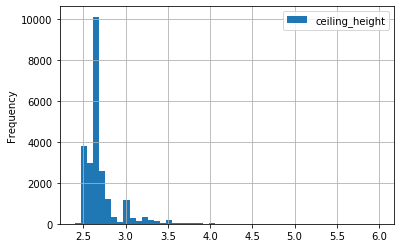

In [43]:
df.plot(y='ceiling_height', kind='hist', bins=50, grid=True, figsize=(6,4))
df['ceiling_height'].describe()

Подавляющее количество квартир имеют высоту потолка 2.65 метра. Она же является медианой. Возможно это связано с тем что на этапе предоработки мы объявлениям с пропуками присаивали медианное значение. Стоит это обсудить с коллегами, которые предоставляли эти данные. Среднее значение высоты потолка - 2.7 метра. 

Следующая гипотеза:

2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Отсортируем объявления по количетсву дней в продаже и построим гистограмму.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,median_centr_nearest,price_of_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_rait,kitchen_area_rait
days_exposition,,,,,,,,,,,,,,,,,,,,,
45.0,880,880,880,880,880,880,880,880,880,880,...,428,201,434,880,880,880,880,880,880,880
60.0,538,538,538,538,538,538,538,538,538,538,...,465,231,468,538,538,538,538,538,538,538
7.0,234,234,234,234,234,234,234,234,234,234,...,184,82,184,234,234,234,234,234,234,234
30.0,208,208,208,208,208,208,208,208,208,208,...,187,86,188,208,208,208,208,208,208,208
90.0,204,204,204,204,204,204,204,204,204,204,...,189,117,189,204,204,204,204,204,204,204
4.0,176,176,176,176,176,176,176,176,176,176,...,140,63,140,176,176,176,176,176,176,176
3.0,158,158,158,158,158,158,158,158,158,158,...,129,49,130,158,158,158,158,158,158,158
5.0,152,152,152,152,152,152,152,152,152,152,...,125,54,126,152,152,152,152,152,152,152
14.0,148,148,148,148,148,148,148,148,148,148,...,131,62,131,148,148,148,148,148,148,148


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

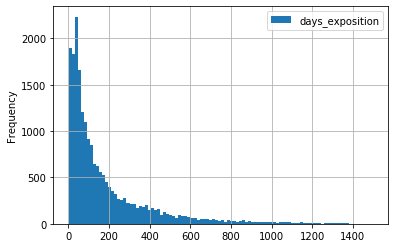

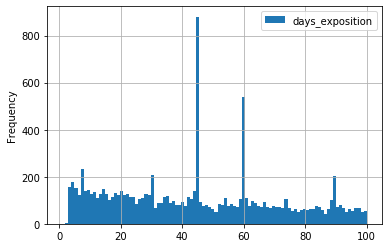

In [44]:
# сортировка вышла очень неопрятной, но я не смог додуматься как сделать лучше.
display(df.groupby('days_exposition').count().sort_values(by='total_images', ascending=False).head(10))

# построим два графика, широким размахом и более узким
df.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,1500))
df.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,100))

# среднее и медиану можно узнать здесь:

df['days_exposition'].describe()



Сортировка действительно вышла некрасивой, но делает то что мне надо. Считает количество объявлений по количеству дней. И закономрность весьма странная - больше всего висят объявления 45 дней. Так же в это число входит продолжительность продажи 60, 7, 30 и 90 дней. Цифры подозрительно ровные. И действительно, в условиях размещения объявления по умолчанию стоит 30 дней. Можно сделать вывод, что объявления сняты не по причине продажи дома, а по причине истечения срока размещения.

Распределение графиков выглядит весьма логичным на первой ггистограмме, бОльшая часть объявлений висит меньше месяца. Стандартное распределение. На втором графике мы видим выделяющиеся значения в 45, 60, 90, 7 и 30 дней. 

Среднее значение срока продажи - 181 день, медиана - 95 дней. 

Межквартильный размах у нас от 45 до 232 дней, соответственно что было продано быстрее 45 дней, то можно считать быстрой продажей, а что дольше 232 - долгой. Но это скорее всего некорректные данные, так как нам мешают выбросы 45, 60, 90, 30 и 7 дней. Нужно с ними разобраться. Следующий пункт проекта так и гласит:

3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

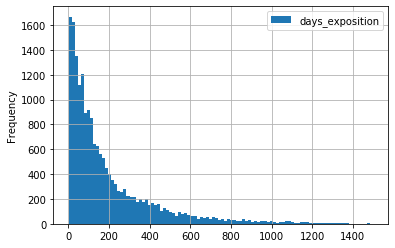

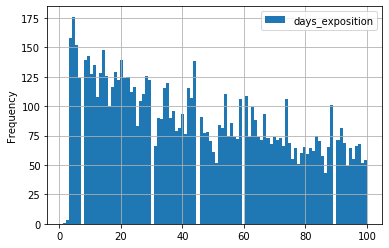

In [45]:
# Убираем ненужные нам значения и повторяем код.
# Убирам пропуски, чтобы поменять тип на целочисленный:
df['days_exposition'] = df['days_exposition'].fillna(0)

# меняем тип на целочисленный, чтобы исключить неугодные нам данные:
df['days_exposition'] = df['days_exposition'].astype('int')

df_fix = df.query('days_exposition != 45 and \
        days_exposition != 30 and \
        days_exposition != 60 and \
        days_exposition != 90 and \
        days_exposition != 7 and \
        days_exposition != 0')


#гистограммы
df_fix.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,1500))
df_fix.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,100))

#среднее значение, медиана и межквартильный размах
df_fix['days_exposition'].describe()

Да, данные ожидаемо изменились. Среднее значение теперь 196, медиана 114. Нормальное распределение согласно квартилям находится в диапазоне от 44 до 259 дней. 

Следующая гипотеза:


4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Соотнесем площадь, число комнат и удаленность от центра с ценой. Несмотря на то что в задании указано сравнить стоимость квартиры, логичнее будет сравнивать цены за квадратный метр, так как однушка за 5 млн и трешка за 5 млн имеют одинаковую цену но разную стоимость (в значении "ценность")

,price_of_meter
total_area,
401.00,1000748.0
187.50,927302.0
285.70,857542.0
268.00,712201.0
242.40,660000.0
243.00,658436.0
38.12,640422.0
187.60,634328.0
410.00,585365.0


0.3021124748836444

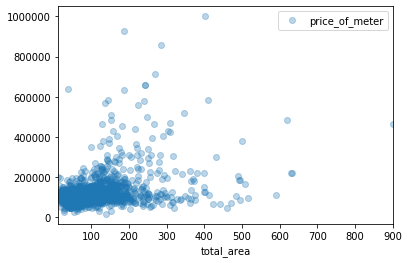

In [46]:
# создаем сводную таблицу:
pivot_table_total_area = df.pivot_table(index='total_area', values='price_of_meter', aggfunc='median')

# сторим график:
pivot_table_total_area.plot(y='price_of_meter', style='o', alpha=0.3)

# сортируем:
display(pivot_table_total_area.sort_values('price_of_meter', ascending=False).head(20))

# ищем линейную корреляцию:
df['total_area'].corr(df['price_of_meter'])

Наибольшая цена за метр у квартир с площадью более 200 квадратных метров. Корреляция площади с ценой за метр невелика, всего 0.3 - это означает при увеличении площади в 2 раза, цена за квадратный метр увеличится всего на 30 %. На графике видна концентрация значений цены квадратного метра до 200 000 рублей при увеличении площади до 200 квадратных метров. 

Таким же образом высчитываем зависимость от количества комнат:

,price_of_meter
rooms,
12,466666.0
11,132639.5
15,110169.0
7,108827.0
8,106760.0
16,105555.0
0,105555.0
1,100000.0
6,99411.0


0.05541784722906923

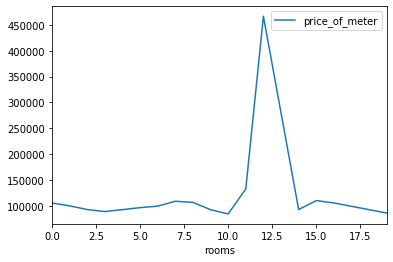

In [47]:
# создаем сводную таблицу:
pivot_table_rooms = df.pivot_table(index='rooms', values='price_of_meter', aggfunc='median')

# сторим график:
pivot_table_rooms.plot(y='price_of_meter')

# сортируем:
display(pivot_table_rooms.sort_values('price_of_meter', ascending=False).head(20))

# ищем линейную корреляцию:
df['rooms'].corr(df['price_of_meter'])

Наибольшая стоимость у квартир с 5 и более комнатами. Корреляция цены и количества комнат всего 0.05, то есть изменение количества комнат влияет всего на 5 процентов на изменение цены квадратного метра. По графику видно что самые дорогие квартиры с 11-12 комнатами. 

Изучаем цену в зависимости удаленности от центра:

,price_of_meter
cityCenters_nearest,
1197.0,1736842.0
1073.0,1542604.0
1722.0,995983.0
6235.0,857542.0
1462.0,848484.0
555.0,658436.0
2380.0,612557.0
8283.0,600000.0
2385.0,588888.0


-0.31973411422313314

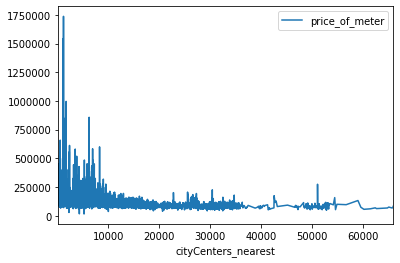

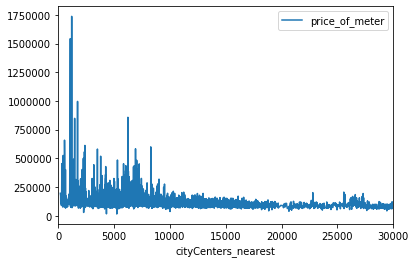

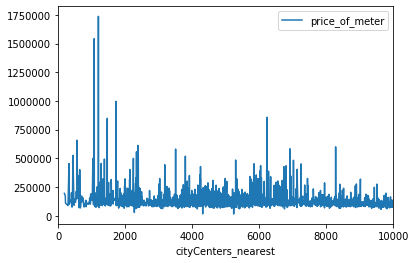

In [48]:
# создаем сводную таблицу:
pivot_table_center = df.pivot_table(index='cityCenters_nearest', values='price_of_meter', aggfunc='median')

# сторим графики, с разным масштабированием:
pivot_table_center.plot(y='price_of_meter')
pivot_table_center.plot(y='price_of_meter', xlim=(0, 30000))
pivot_table_center.plot(y='price_of_meter', xlim=(0, 10000))

# сортируем:
display(pivot_table_center.sort_values('price_of_meter', ascending=False).head(20))

# ищем линейную корреляцию:
df['cityCenters_nearest'].corr(df['price_of_meter'])

Самые дорогие метры в радиусе двух километров... После 10 км стоимость метра стабилизируется менее 250 000 рублей. Корреляция ожидаемо отрицательная, -0.32, то есть по мере увеличения расстояния до центра, стоимость метра уеньшается. 

Далее изучаем зависимость цены от этажа, первый, послдений, или какой то еще. 

,price_of_meter
floor_category,
другой,98295.0
последний,87781.5
первый,81223.0


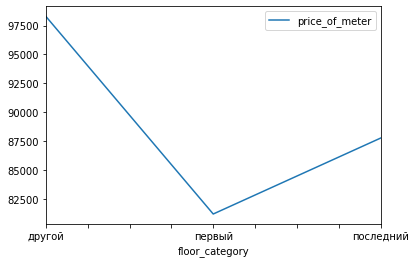

In [49]:
# создаем сводную таблицу:
pivot_table_floor = df.pivot_table(index='floor_category', values='price_of_meter', aggfunc='median')

# сторим график, с разным масштабированием:
pivot_table_floor.plot(y='price_of_meter')

# сортируем:
display(pivot_table_floor.sort_values('price_of_meter', ascending=False))

Люди явно не любят жить на первом этаже, так как тут самые дешевые квартиры. На последнем еще куда не шло, но первый - ну уж нет. На других этажах квартиры явно дороже, на 12 % от квартир на последнем этаже, и на 21 % от квартир на 1 этаже. 

Изучаем зависимость цены квадратного метра от даты размещения - дня недели:

,count,median
weekday_exposition,,
1,4183,95634.0
2,3974,95477.5
3,4295,95143.0
0,3612,94688.0
4,4000,94616.0
6,1699,94501.0
5,1936,93545.5


-0.007301965705521121

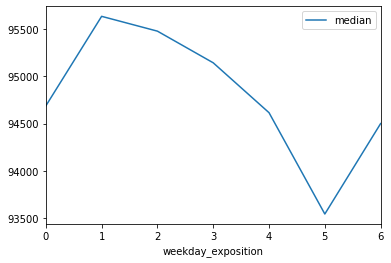

In [50]:
# создаем сводную таблицу:
pivot_table_weekday = df.pivot_table(index='weekday_exposition', values='price_of_meter', aggfunc=['count', 'median'])

# избавляемся от мультииндекса в названии колонок:
pivot_table_weekday.columns = ['count', 'median']

# строим график:
pivot_table_weekday.plot(y='median')

# для наглядности еще и отсортируем таблицу по стоимости:
display(pivot_table_weekday.sort_values('median', ascending = False))

# ну и найдем корреляцию:
df['weekday_exposition'].corr(df['price_of_meter'])

Сразу обратим внимание на ничтожную корреляцию - зависимость всего 0.7% процента. Можно сказать зависимости нет. Но она есть, и график нам её демонстрирует. Во вторник цены самые высокие, в субботу самые низкие. Сложно рассуждать о факторах, влияющих на такое ценообразование, особенно учитывая ничтожную зависимость, однако смею предположить, что во вторник люди думают выставят подороже, чтобы потом сбавить цену, а в субботу сбавляют, либо выставляют дешевле, чтобы найти покупателя, так как на выходных есть время показать квартиру, повозиться с бумажками. В будние дни это может оказаться дорогим удовольствием, если пытаться отпроситься с работы. Но в то же время покупателя можно найти и в будние дни, а встречу назначить на выходные. Однако повторюсь - учитывая корреляцию - это всего лишь домыслы, и несколько объявлений с выбросовыми ценами могут сильно изменить картину. 

Изучаем зависимость цены квадратного метра от даты размещения - от месяца:

,count,median
month_exposition,,
4,2379,96451
8,1744,96026
9,1981,95607
11,2371,95588
3,2587,95348
1,1500,95222
2,2640,95000
7,1695,95000
12,1641,94262


-0.0020869094268662707

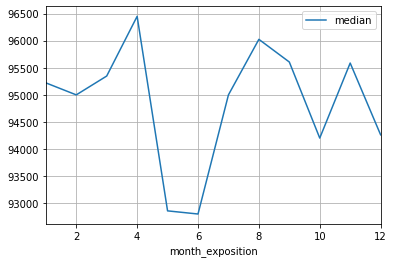

In [51]:
# создаем сводную таблицу:
pivot_table_month = df.pivot_table(index='month_exposition', values='price_of_meter', aggfunc=['count', 'median'])

# избавляемся от мультииндекса в названии колонок:
pivot_table_month.columns = ['count', 'median']

# строим график:
pivot_table_month.plot(y='median', grid=True)

# для наглядности еще и отсортируем таблицу по стоимости:
display(pivot_table_month.sort_values('median', ascending = False))

# ну и найдем корреляцию:
df['month_exposition'].corr(df['price_of_meter'])

На этом вычислении я понял что корреляция высчитывается линейная, а это не совсем подходит для анализа. В данном случае линейная корреляция получилась 0.2%, однако путем математических вычислений выясняем отличие экстримальных значений - минимальных от максимальных - составляет 3.8%. Главным образом стоит отметить самые дорогие квартиры в апреле и самые дешевые в июне. Здесь логика, на мой взгляд, схожа с размещением объявлений по дням - в апреле задирают цены чтобы потом немного сбавить, что и происходит в мае - сильный скачок цен вниз. Самые низкие в июне - продать квартиру и уехать на эти деньги отдыхать. Ну или вложить в бизнес и развивать его летом, так как у многих отпуск именно летом. У всех педагогических работников тоже. Мне как педагогу очень часто хочется уйти в бизнес...

Изучаем зависимость цены квадратного метра от даты размещения - от года размещения:

,count,median
year_exposition,,
2014,137,107000.0
2019,2879,103351.0
2018,8519,95689.0
2015,1191,93414.0
2017,8190,92564.5
2016,2783,91743.0


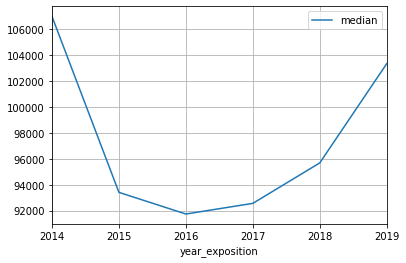

In [52]:
# создаем сводную таблицу:
pivot_table_year = df.pivot_table(index='year_exposition', values='price_of_meter', aggfunc=['count', 'median'])

# избавляемся от мультииндекса в названии колонок:
pivot_table_year.columns = ['count', 'median']

# строим график:
pivot_table_year.plot(y='median', grid=True)

# для наглядности еще и отсортируем таблицу по стоимости:
display(pivot_table_year.sort_values('median', ascending = False))

Здесь картина более плавная - самые дорогие объявления размещены в 2014 году, самые дешевые в 2016 году. Дело скорее всего в общей динамике цен по стране. В поисковой строке мониторинга рынка недвижимости на просторах интернет первый результат - одной компании недвижимости, которая предоставляет данные по всей стране с 2012 по 2021 год:

<a target="_blank" href="https://radikal.ru"><img src="https://a.radikal.ru/a21/2112/fc/39992b319edb.png" /></a>


Судя по графикам цены весьма адекватно коррелируются. 

Следующее задание гласит:

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Нам снова не обойтись без сводных таблиц:

In [53]:
# общая сводная таблица:
pivot_table_city = df.pivot_table(index='locality_name', values='price_of_meter', aggfunc=['count', 'mean'])

# избавялемся от мультииндекса в названии колонок:
pivot_table_city.columns = ['count', 'mean']

# сортировка по количеству объявлений:
display(pivot_table_city.sort_values('count', ascending=False).head(10))

# самая высокая стоимость жилья:
display(pivot_table_city[pivot_table_city['mean']==pivot_table_city['mean'].max()])

# самая низкая стоимость жилья:
display(pivot_table_city[pivot_table_city['mean']==pivot_table_city['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,15758,114828.516182
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


,count,mean
locality_name,,
посёлок Лисий Нос,2,121615.5


,count,mean
locality_name,,
деревня Старополье,3,11206.0


Самая дорогая в среднем недвижимость ожидаемо в Санкт-Петербурге. В то время как десятку по стоимость квадратного метра занимает Выборг. Если взять отдельные объявления то самое дорогое зарегистрировано, как ни странно, в посёлке Лисий Нос. Самая дешевая - в деревне Старополье, здесь метр жилья можно купить за МРОТ...

Следующая задача:Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

И снова сводные таблицы, графики...

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


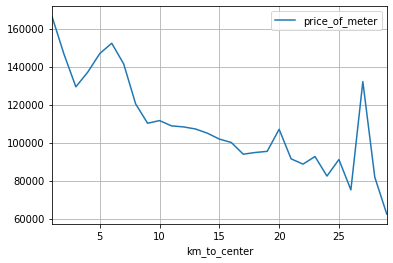

In [54]:
# создадим данные только по Питеру:
df_piter = df[df['locality_name']=='Санкт-Петербург']

# создаем колонку с километражом до центра:
df_piter.loc[:, 'km_to_center'] = df_piter.loc[:, 'cityCenters_nearest']/1000
df_piter.loc[:, 'km_to_center'] = df_piter.loc[:, 'km_to_center'].astype('int')


# создаем сводную таблицу со средней ценой квадратного метра по километрам:
pivot_table_km = df_piter.query('km_to_center != 0').pivot_table(index='km_to_center', values='price_of_meter', aggfunc='mean')
pivot_table_km.plot(grid=True)


После 9-ти километров график снижения цены становится более пологим. Думаю целесообразно считать центром радиус в 9 км. Пик цены после 26 км - скорее всего элитные загородные дома, или новые ЖК на окраине. 


Следующее задание: Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?


Создадим новый датафрейм с данными по центру Питера, по нему сводную таблицу с площадью, ценой, числом комнат и высотой потолков. Затем повторим все вычисления и графики которые делали для общих даных - сравним стоимость метра в зависимости от количества комнат, этажа, удаленности от центра и даты размещения объявления:

,ceiling_height,price_of_meter,rooms,total_area
km_to_center,,,,
0,3.058256,187323.674419,3.220930,112.130000
1,3.052893,166441.743802,3.239669,103.219421
2,3.079674,146662.420195,3.114007,98.856482
3,2.975170,129369.694340,3.016981,91.446075
4,2.953766,137147.834061,2.924672,96.007052
5,2.898208,146873.966234,2.740260,93.921597
6,2.850404,152277.455319,2.338298,82.903319
7,2.748600,141399.287469,2.422604,77.187150
8,2.782308,120377.781065,2.208580,67.609038


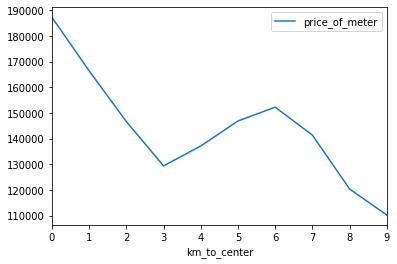

In [55]:
# создаем еще один датафрейм для квартир в центре Питера:
df_piter_center = df_piter[df_piter['km_to_center'] <= 9]

# создадим сводную таблицу включающую площадь, цену, число комнат и высоту потолка.
pivot_df_piter_center = df_piter_center.pivot_table(index='km_to_center', values=['total_area', 'price_of_meter', 'rooms', 'ceiling_height'])

# выведем на экран таблицу:
display(pivot_df_piter_center)

# построим график со стоимостью квадратного метра:
pivot_df_piter_center.plot(y='price_of_meter')

Из сводной таблицы мы видим четкую закономерность - Высота потолков, количество комнат и общая площадь уменьшаются по мере отдаления от центра. В то время как стоимость метра не такая очевидная. Для нее мы построили график, на нем видно снижение цены в радиусе 3-х километров, и подорожание квартир в радиусе 6-ти км. Сложно конкретизировать рассуждения, возможно это связано с инфраструктурной доступностью жилья в отдельных районах. Отдадим эту информацию на растерзание риэлторам. 

Далее повторяем вычисления для нового набора данных - вычисляем зависимость цены квадратного метра от количества комнат:

,price_of_meter
rooms,
12,466666.0
11,132639.5
0,130000.0
1,128669.5
2,119205.0
3,113416.0
15,110169.0
7,109996.0
4,109452.5


0.037143956278693095

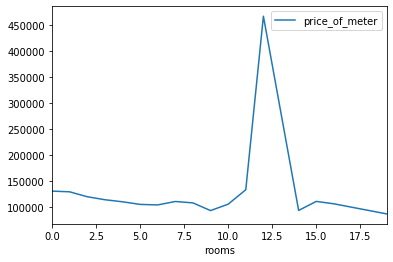

In [56]:
# создаем сводную таблицу:
pivot_table_rooms_center = df_piter_center.pivot_table(index='rooms', values='price_of_meter', aggfunc='median')

# сторим график:
pivot_table_rooms_center.plot(y='price_of_meter')

# сортируем:
display(pivot_table_rooms_center.sort_values('price_of_meter', ascending=False).head(20))

# ищем линейную корреляцию:
df_piter_center['rooms'].corr(df_piter_center['price_of_meter'])

Хоромы с 12 комнатами все еще вляют на исслдование но мы видим более плавное снижение цены с увеличением числа комнат, а точнее большее увеличение цены с уменьшением числа комнат. Корреляция немного меньше, 3.8% против 5.8% общей выборки.

Зависимость цены от этажа:

,price_of_meter
floor_category,
другой,122093.0
последний,113246.5
первый,103703.0


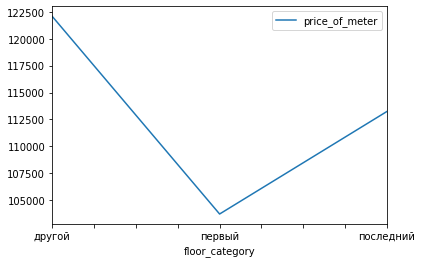

In [57]:
# создаем сводную таблицу:
pivot_table_floor_center = df_piter_center.pivot_table(index='floor_category', values='price_of_meter', aggfunc='median')

# сторим график, с разным масштабированием:
pivot_table_floor_center.plot(y='price_of_meter')

# сортируем:
display(pivot_table_floor_center.sort_values('price_of_meter', ascending=False))

Квартиры на первом этаже все также самые дешевые, средняя цена у квартир на последнем этаже. Средние этажи имеют самую высокую стоимость. На других этажах квартиры явно дороже, на 7 % от квартир на последнем этаже, в отличие от общей выборки в 12 %, и на 15 % от квартир на 1 этаже в отличие от 21 % общей выборки. То есть разница цен немного меньше, чем общей выборки.

Изучаем цену в зависимости от удаленности от центра:

,price_of_meter
cityCenters_nearest,
1197.0,1736842.0
1073.0,1542604.0
1722.0,995983.0
6235.0,857542.0
1462.0,848484.0
555.0,658436.0
2380.0,612557.0
8283.0,600000.0
2385.0,588888.0


-0.1460674666877753

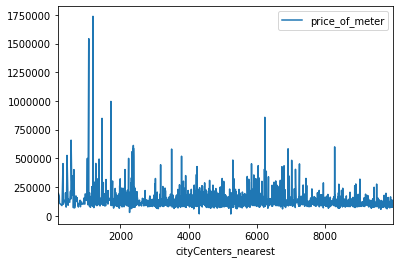

In [58]:
# создаем сводную таблицу:
pivot_table_center_center = df_piter_center.pivot_table(index='cityCenters_nearest', values='price_of_meter', aggfunc='median')

# сторим график:
pivot_table_center_center.plot(y='price_of_meter')

# сортируем:
display(pivot_table_center_center.sort_values('price_of_meter', ascending=False).head(20))

# ищем линейную корреляцию:
df_piter_center['cityCenters_nearest'].corr(df_piter_center['price_of_meter'])

Ожидаемо нет никаких отличий, так как данные идентичны, только ограничены девятью километрами. Хотя линейная корреляция 15% против 32% общей выборки - зависимость в два раза меньше. 

Зависимость цены от даты размещения - дня недели:

,count,median
weekday_exposition,,
6,318,123118.0
5,376,121144.5
0,781,119354.0
2,861,118364.0
4,853,117968.0
3,1017,117142.0
1,891,116788.0


0.006980149144354144

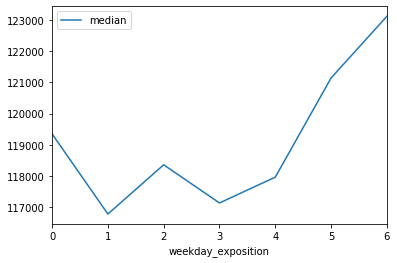

In [59]:
# создаем сводную таблицу:
pivot_table_weekday_center = df_piter_center.pivot_table(index='weekday_exposition', values='price_of_meter', aggfunc=['count', 'median'])

# избавляемся от мультииндекса в названии колонок:
pivot_table_weekday_center.columns = ['count', 'median']

# строим график:
pivot_table_weekday_center.plot(y='median')

# для наглядности еще и отсортируем таблицу по стоимости:
display(pivot_table_weekday_center.sort_values('median', ascending = False))

# ну и найдем корреляцию:
df_piter_center['weekday_exposition'].corr(df_piter_center['price_of_meter'])

Здесь в отличие от общей выборки самые дорогие объявления размещены в выходные, особенно в вокресенье. Самые низкие цены во вторник. Графики практически противоположны. Неужели все в выходные хотят больше заработать?

Зависимость цены от даты размещения - месяца:

,count,median
month_exposition,,
8,373,123584.0
3,561,123110.0
9,431,120444.0
1,321,119607.0
11,480,119491.0
10,437,118625.0
12,339,118333.0
4,497,117567.0
7,399,116753.0


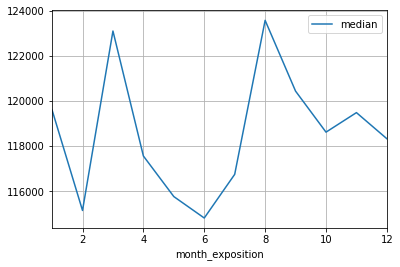

In [60]:
# создаем сводную таблицу:
pivot_table_month_center = df_piter_center.pivot_table(index='month_exposition', values='price_of_meter', aggfunc=['count', 'median'])

# избавляемся от мультииндекса в названии колонок:
pivot_table_month_center.columns = ['count', 'median']

# строим график:
pivot_table_month_center.plot(y='median', grid=True)

# для наглядности еще и отсортируем таблицу по стоимости:
display(pivot_table_month_center.sort_values('median', ascending = False))

Есть небольшое сходство, зимой и летом самые дешевые квартиры. Однако самые дорогие не весной, в конце лета, в отличие от общей выборки. Тут видимо логика другая - сначала все потратить летом, а осенью заработать на продаже квартиры. Хотя весенние цены (марта) не сильно отстают от августовских. 

Зависимость цены от даты размещения - года:

,count,median
year_exposition,,
2014,41,141630.0
2019,584,128579.0
2018,1610,119276.5
2017,1761,116119.0
2015,409,115000.0
2016,692,114441.0


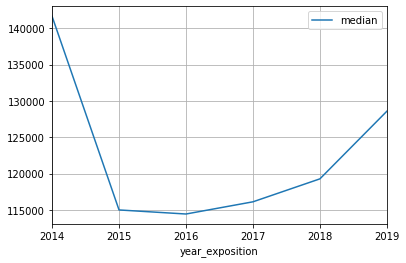

In [61]:
# создаем сводную таблицу:
pivot_table_year_center = df_piter_center.pivot_table(index='year_exposition', values='price_of_meter', aggfunc=['count', 'median'])

# избавляемся от мультииндекса в названии колонок:
pivot_table_year_center.columns = ['count', 'median']

# строим график:
pivot_table_year_center.plot(y='median', grid=True)

# для наглядности еще и отсортируем таблицу по стоимости:
display(pivot_table_year_center.sort_values('median', ascending = False))

На графике можно заметить более резкое падение цен в 2015 году, в отличие от общей выборки, а затем планый рост. 

## Общий вывод

Мы обработали массив данных, заменили пропуски где это было необходимо, заменили типы данных для дальнейшей работы с ними. Вывели день недели, месяц и год в отдельные столбцы. 

Изучая время продажи квартир, мы нашли выбивающиеся значения, которые говорили не о продаже квартир, а об автоматическом снятии объявления  с продажи, поэтому мы исклюючили эти данные из анализа. Среднее значение сроков продажи квартиры составило 196 дней, медиана 114 дней. Нормальное распределение согласно квартилям находится в диапазоне от 44 до 259 дней.

Во время поиска закономерностей цены мы выяснили, что в центре стоимость жилья выше чем на окраине. Центр Питера по нашим данным можно считать площадь с радиусом в 9 километров. Также на стоимость квартиры влияет количество комнат - чем меньше комнат, тем выше стоимость квадратнго метра. Чем выше потолок, ближе к центру, тем также выше стоимость. Зависимость цены от даты размещения есть, но корреляция невелика, и поэтому нет особой разницы в стоимости квартир. Данные по всей выборке и по центру Питера почти везде схожи, кроме стоимости в зависимости от дня недели и месяца размещения - в центре Питера самые дорогие объявления в воскресенье, в августе, в то время как в общей своей массе самые дорогие объявления во вторник, в июне. Самые дешевые в центре во вторник в июне, в то время как в общей массе объявления дешевели к субботе. Зависимость от года продажи схожа, только в 2015 году в центре цены упали сильнее чем в целом по всей Ленинградской области. 

P.S.

Проект делал нестабильно из-за предновогодней суеты и завала на работе. Уверен в следующий раз будет более органично и красиво. С Новым Годом! :=)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод